## Сборный проект. Определение потенциально популярного продукта на 2017 год в сфере игроиндустрии.

**Описание проекта**\
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.\
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.\
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных** \
Name — название игры \
Platform — платформа \
Year_of_Release — год выпуска \
Genre — жанр игры \
NA_sales — продажи в Северной Америке (миллионы долларов) \
EU_sales — продажи в Европе (миллионы долларов) \
JP_sales — продажи в Японии (миллионы долларов) \
Other_sales — продажи в других странах (миллионы долларов) \
Critic_Score — оценка критиков (максимум 100) \
User_Score — оценка пользователей (максимум 10) \
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Шаг 1. Знакомство с данными.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [0]:
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод.

На данном этапе произведено ознакомление с данными. Данные как всегда не идеальны: есть столбцы с пропусками, названия столбцов лучше привести к нижнему регистру, в User_Score изменить тип данных.

### Шаг 2. Предобработка данных.

In [0]:
df.columns = df.columns.str.lower()

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [0]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [0]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [0]:
print(df['platform'].unique())
print(len(df['platform'].unique()))

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
31


Значения *tbd* заменим на NaN, т.к. tbd расшифровывается как "to be determined", соответственно данного значения пока еще в принципе не существует.

In [0]:
df.loc[df['user_score']=='tbd', 'user_score'] = float('nan')

In [0]:
df['user_score'] = df['user_score'].astype('float', errors='ignore')

In [0]:
df.duplicated().sum()

0

In [0]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [0]:
df['rating'] = df['rating'].fillna('Not defined')
df['rating'].isna().sum()
df.loc[df['rating'] == 'RP', 'rating'] = 'Not defined'

In [0]:
df['world_sales'] = df['na_sales'] + df['jp_sales'] + df['eu_sales'] + df['other_sales']

### Вывод.

- Изменён тип данных на вещественный в *user_score*
- Значения 'tbd' в этой же колонке заменены на nan, т.к. по смыслу это одно и то же
- Пропуски в *rating* заполнены значением 'Not defined', чтобы явно указать, что возрастная категория данной игры не известна
- Значение 'RP' в *rating* заменено на 'Not defined', т.к. 'RP' - это 'Rating Pending' (Рейтинг ожидается и т.е. на данный момент не известен)
- Посчитаны суммарные мировые продажи

## Шаг 3. Исследовательский анализ данных

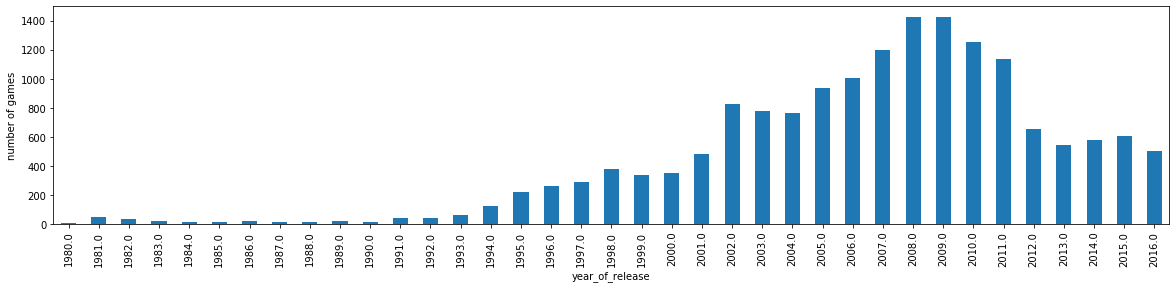

In [0]:
df.groupby('year_of_release')['year_of_release'].count().plot(kind='bar', figsize=(20,4))
sb.set()
sb.set_palette('Set2')
plt.ylabel('number of games')
plt.show()

Для оценки ситуации на 2017 год нет смысла рассматривать все время от 1980 года, так как в разные периоды времени ситуация была совершенно разной. Исходя из диаграммы, **актуальным периодом будем считать 2012 - 2016 годы**, поскольку число выпущенных игр в эти годы были примерно одинаковы.

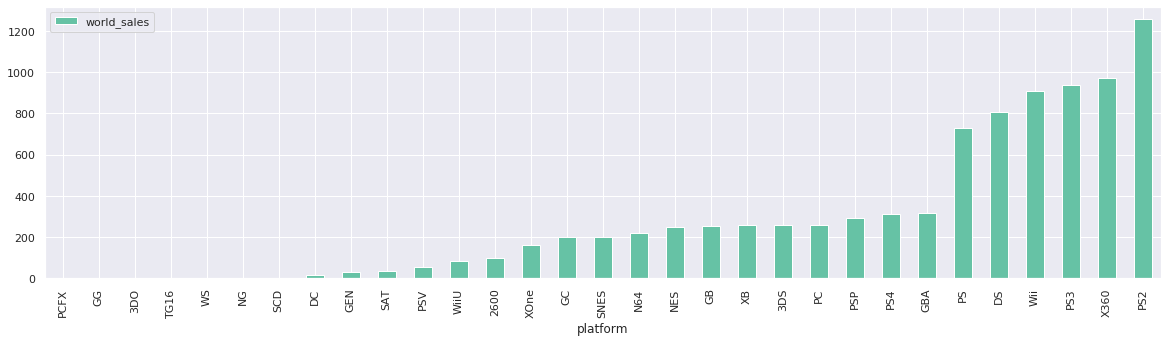

In [0]:
# смотрим на количество продаж по платформам
platform_pivot = (df
    .pivot_table(index='platform', values='world_sales', aggfunc='sum')
    .sort_values(by='world_sales')
    )
platform_pivot.plot(kind='bar', figsize=(20,5))
plt.show()

<p style="color:green">Отличная визуализация получилась</p>

In [0]:
big_platforms = platform_pivot.sort_values(by='world_sales', ascending=False)[0:6].index
big_platforms #платформы с наибольшими продажами

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

In [0]:
df_big_platforms = df.query('platform in @big_platforms') 
df_big_platforms #срез строк, где только платформы с большими продажами

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,Not defined,0.01
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,Not defined,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Not defined,0.01


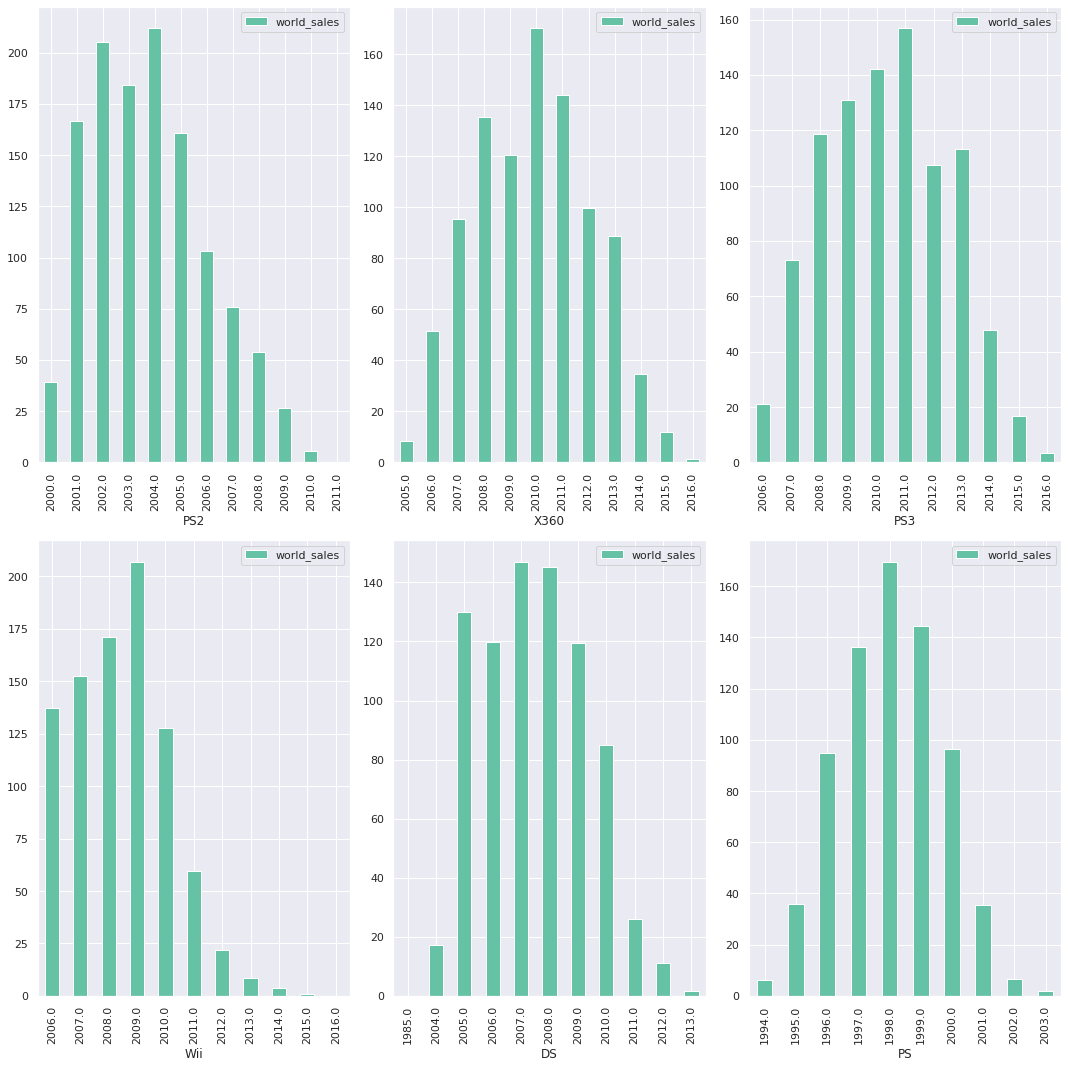

In [0]:
# зададим ф-цию, к-я будет строить неколько столбчатых диаграмм на одном поле, это будет удобно для сравнения. На вход функция
# получает датасет, список с названиями игровых платформ и размеры поля
def world_sales_by_year(data, my_list,n,m, ysize):
    temp = data.pivot_table(index=['platform','year_of_release'], values='world_sales', aggfunc='sum')
    plt.subplots(n,m,figsize=(15,ysize))
    i = 1
    for platform in my_list:
        ax = plt.subplot(n,m,i)
        l = list(temp.query('platform==@platform').index.get_level_values(1)) # получаем список годов для каждой гистограммы
        temp.query('platform==@platform').plot(kind='bar', ax=ax, label=platform)
        plt.legend()
        plt.xlabel(platform)
        i+=1
        ax.set_xticklabels(l) # заменяем тики только на значения годов
    plt.tight_layout()
# вызов функции для распределения продаж самых крупных платформ по годам
world_sales_by_year(df_big_platforms, big_platforms,2,3, 15)

Распределения продаж по годам всех шести платформ очень похожи, немного выбивается по виду графика только Wii. Для всех остальных можно выделить три периода: постепенное появление игр на данной платформе (продаж мало, но они понемногу растут), бурное развитие и достижение максимума продаж и постепенное падение продаж до очень низких значений. Ситуация для Wii характерна резким ростом сразу с момента появления платформы в 2006. Характерным сроком, за который появляются новые и исчезают старые платформы, можно назвать промежуток в 10-11 лет. 

Так как наш актуальный период - это 2012-2016 годы, то выделим эти строки в отдельную таблицу.

In [0]:
df_actual = df.query('2012 <= year_of_release <= 2016')
df_actual.platform.unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

In [0]:
len(df_actual.platform.unique())

11

В актуальном периоде выпускались игры только на 11 платформах, а за весь период с 1980 года их было 31. Много игровых платформ совсем устарели, поэтому мы их не учитываем в прогнозе на 2017 год.

In [0]:
df_actual.groupby('platform')['world_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: world_sales, dtype: float64

Возьмем из этого списка первые 5 платформ и будем считать их самыми прибыльными.

In [0]:
top_actual_platforms = df_actual.groupby('platform')['world_sales'].sum().sort_values(ascending=False).index[0:5]
top_actual_platforms

Index(['PS4', 'PS3', 'X360', '3DS', 'XOne'], dtype='object', name='platform')

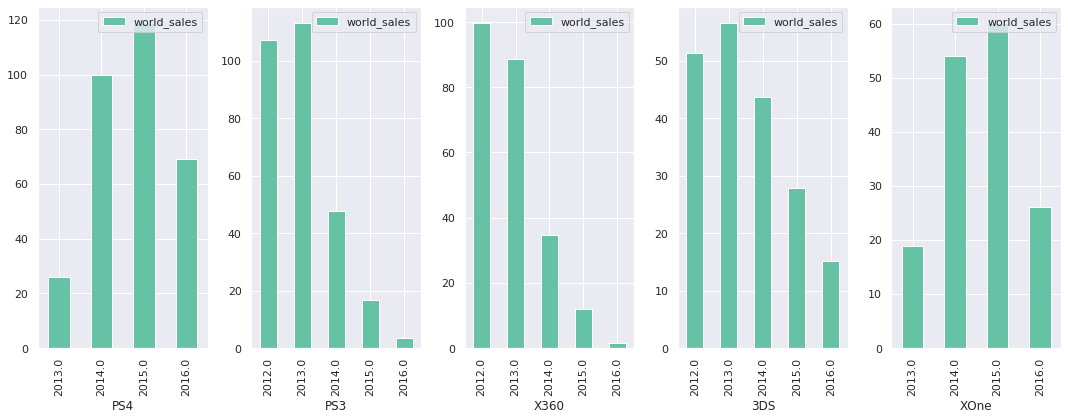

In [0]:
df_top5_actual_platforms = df_actual.query('platform in @top_actual_platforms')
world_sales_by_year(df_top5_actual_platforms, top_actual_platforms, 1, 5, 6)

Выделив 5 самых прибыльных платформ из акутального периода, видно, что к концу периода их продажи падают. Нужно проверить, а не растут ли продажи  к концу периода для платформ, которые не попали в топ продаж? Может быть, на начало периода у них мало продаж, но к 2016 году они постепенно растут. Если это так, тогда нужно учесть их влияние на 2017 год.

In [0]:
bottom_actual_platforms = df_actual.groupby('platform')['world_sales'].sum().sort_values(ascending=False).index[5:11]
bottom_actual_platforms

Index(['WiiU', 'PC', 'PSV', 'Wii', 'DS', 'PSP'], dtype='object', name='platform')

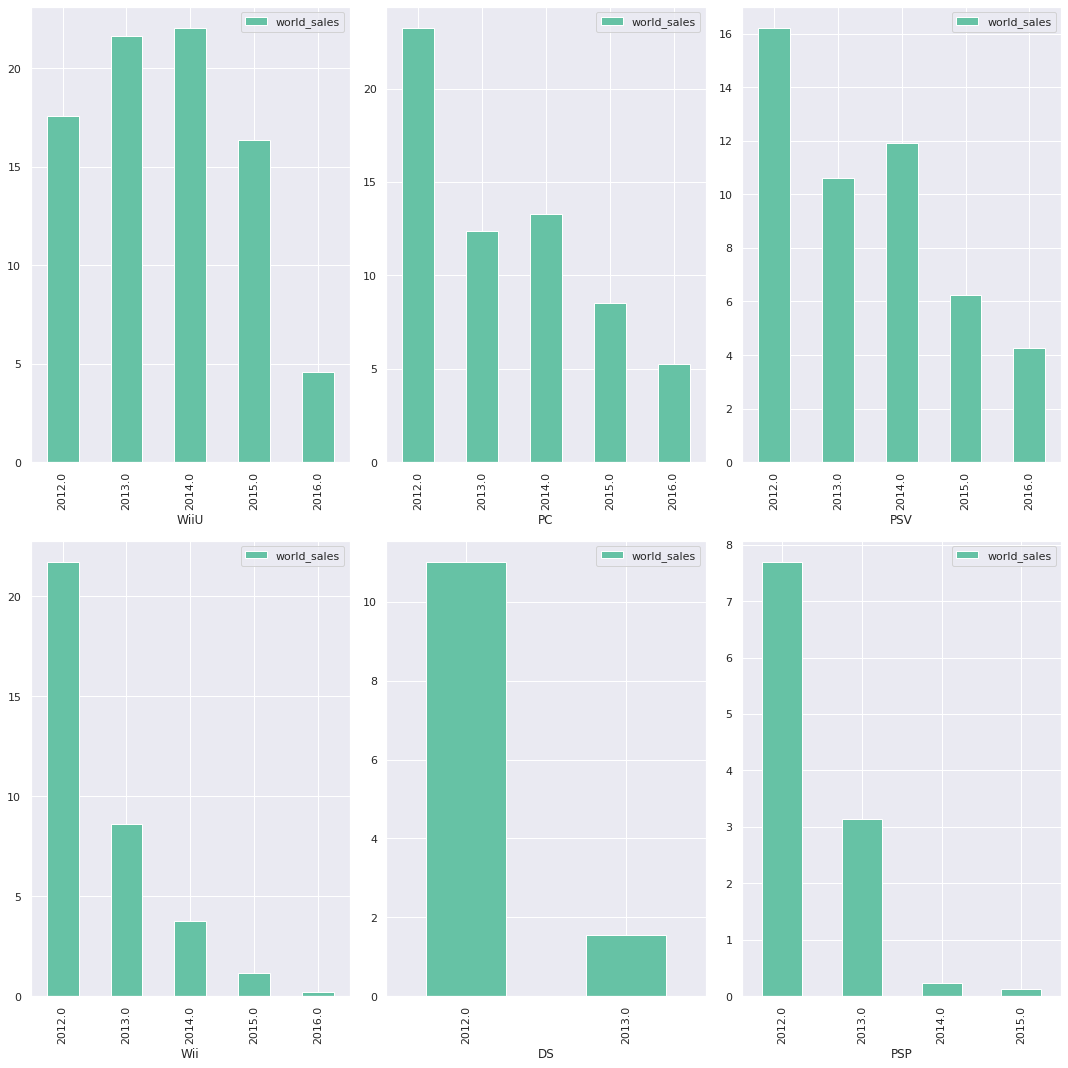

In [0]:
df_bottom_actual_platforms = df_actual.query('platform in @bottom_actual_platforms')
world_sales_by_year(df_bottom_actual_platforms, bottom_actual_platforms, 2, 3, 15)

Предположение не подтвердилось: видим, что и у платформ с малыми продажами выручка падает постепенно к концу актуального периода, а значит ни одна из этих платформ скорее всго не наберёт резко популярности в 2017 году.

Таким образом, из 5 потенциально прибыльных в 2017 платформ, можно выделить три: .

In [0]:
# выделим 10 самых продаваемых игр
best_games = df_actual.groupby('name')['world_sales'].sum().sort_values(ascending=False)[0:10]
best_games

name
Grand Theft Auto V                56.58
Call of Duty: Black Ops II        29.40
Call of Duty: Ghosts              27.39
Call of Duty: Black Ops 3         25.67
Minecraft                         24.16
Call of Duty: Advanced Warfare    21.97
FIFA 15                           17.37
FIFA 14                           16.46
FIFA 16                           16.30
FIFA Soccer 13                    15.97
Name: world_sales, dtype: float64

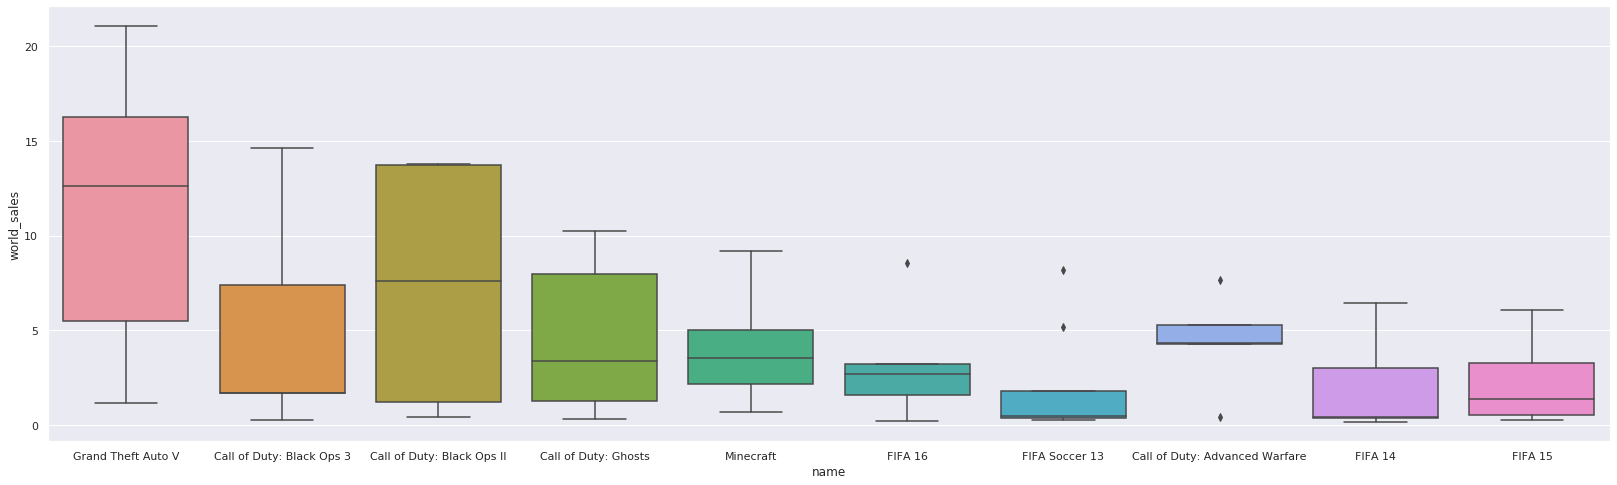

In [0]:
plt.figure(figsize=(28,8))
sb.boxplot(data=df_actual.query('name in @best_games.index'), x='name', y='world_sales')
plt.show()

Посмотрим теперь, как распределены продажи для каждой из топ-10 игр по разным платформам:

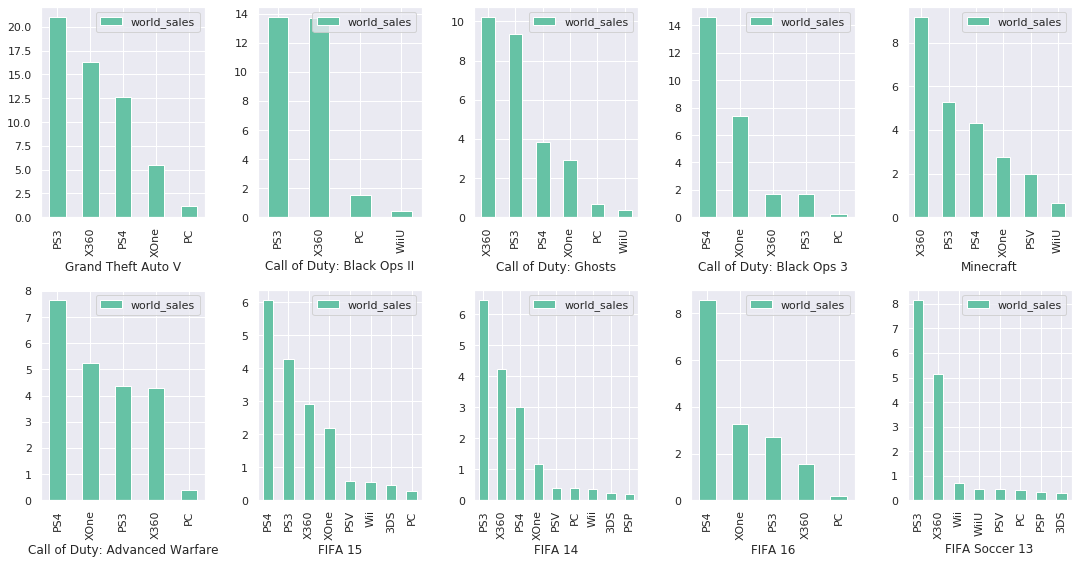

In [0]:
plt.subplots(2,5,figsize=(15,8))
i = 1
for game in best_games.index:
    ax=plt.subplot(2,5,i)
    df_actual.query('name==@game').plot(kind='bar', x='platform', y='world_sales', ax=ax)
    ax.set_xlabel(game)
    i += 1
plt.tight_layout()

Из этих графиков можно заключить, что для каждой популярной игры в лидеры по продажам выходят +- одни и те же платформы. Х360, PS3, как правило, всегда в лидерах продаж, а РС и WiiU на низких позициях.

In [0]:
df_actual.query('name in @best_games.index').genre.unique()

array(['Action', 'Shooter', 'Misc', 'Sports'], dtype=object)

Причём жанры топовых игр достаточно различны и платформы, имеющие большинство продаж, выпускают игры разных жанров. К примеру, PS4 одинаково успешно продает как спортивную FIFA15, так и ролевую стрелялку Call of Duty: Advanced Warfare.

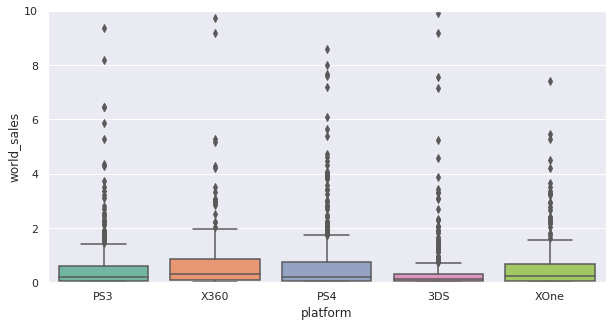

In [0]:
plt.figure(figsize=(10,5))
sb.boxplot(data=df_top5_actual_platforms, x='platform', y='world_sales')
plt.ylim(0,10)
plt.show()

In [0]:
platforms_top10_games = df_actual.query('name in @best_games.index')['platform'].unique()
# это платформы, на которых выпускаются топ-10 по продажам игр
platforms_top10_games

array(['PS3', 'X360', 'PS4', 'XOne', 'PSV', 'PC', 'Wii', 'WiiU', '3DS',
       'PSP'], dtype=object)

In [0]:
df_top5_actual_platforms.platform.unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne'], dtype=object)

Самые прибыльные платформы выпускают игры, которые входят в топ-10 по продажам. Разница в глобальных продажах между топовыми играми и топовыми платформами велика, она может достигать ~15 млн.

In [0]:
# посмотрим на средние характеристики в актуальном периоде, не аккумулируя по годам
df_actual.groupby('platform')['world_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


Оценим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. В качестве популярной платформы выберем PS3, так как на ней выпущено больше всего игр (708).

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


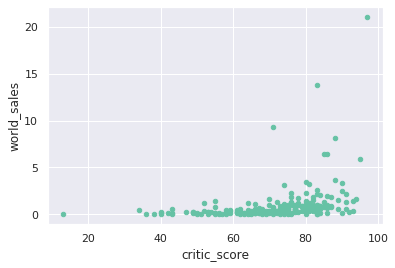

In [0]:
df_actual.query('platform=="PS3"').plot(kind='scatter', x='critic_score', y='world_sales')
plt.show()

In [0]:
df_actual.query('platform=="PS3"')['critic_score'].corr(df_actual.query('platform=="PS3"')['world_sales'])

0.3314972592629587

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


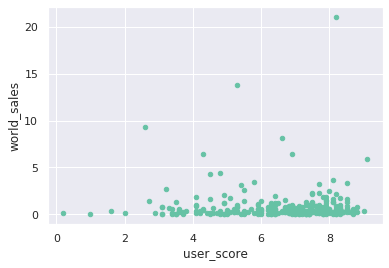

In [0]:
df_actual.query('platform=="PS3"').plot(kind='scatter', x='user_score', y='world_sales')
plt.show()

In [0]:
df_actual.query('platform=="PS3"')['user_score'].corr(df_actual.query('platform=="PS3"')['world_sales'])

-0.005143522887113795

По диаграммам рассеяния и коэффициентам корреляции Пирсона видим, что есть слабая положительная зависимость продаж от оценки критиков, а от оценки пользователей зависимости нет. Проверим, есть ли корреляция для других платформ.

In [0]:
platforms_actual = df_actual['platform'].unique()
for platform in platforms_actual:
    temp = df_actual.query('platform==@platform')
    print(platform,'коэффициент корреляции:',temp['critic_score'].corr(temp['world_sales']))

PS3 коэффициент корреляции: 0.3314972592629587
X360 коэффициент корреляции: 0.36057348885073354
PS4 коэффициент корреляции: 0.40656790206178095
3DS коэффициент корреляции: 0.32080286953607856
DS коэффициент корреляции: nan
XOne коэффициент корреляции: 0.41699832800840186
WiiU коэффициент корреляции: 0.34837976012017496
Wii коэффициент корреляции: -0.4243413011077494
PC коэффициент корреляции: 0.23724324311567915
PSV коэффициент корреляции: 0.0944878992931617
PSP коэффициент корреляции: nan


/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Для практически всех платформ (кроме PSV) наблюдается корреляция между оценкой критиков и продажами.

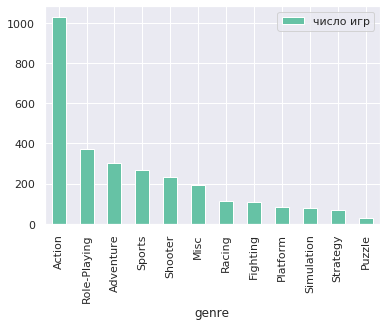

In [0]:
# распределение жанров по количеству игр
df_actual.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar', label='число игр', legend=True)
plt.show()

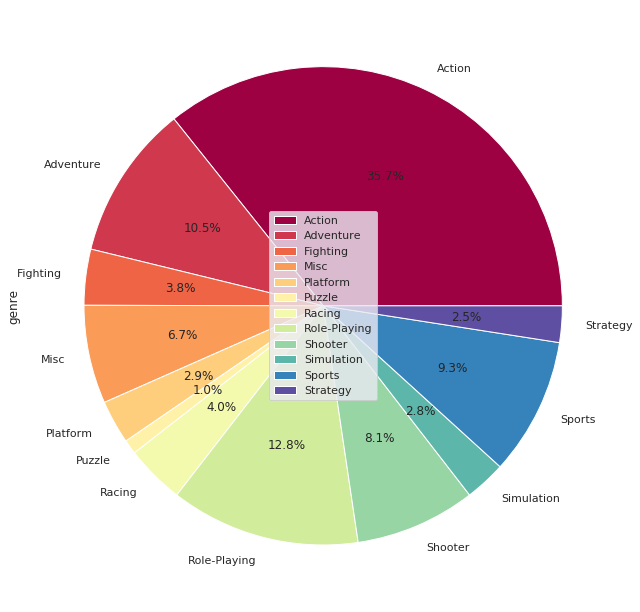

In [0]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')
df_actual.groupby('genre')['name'].count().plot.pie(figsize=(11,11), autopct='%.1f%%', label='genre', legend=True, cmap=cmap)
plt.legend(loc='center')
plt.show()

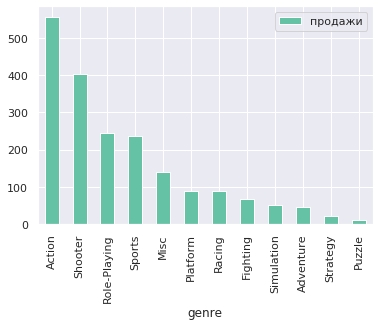

In [0]:
# распределение жанров по глобальной прибыли
df_actual.groupby('genre')['world_sales'].sum().sort_values(ascending=False).plot(kind='bar', label='продажи', legend=True)
plt.show()

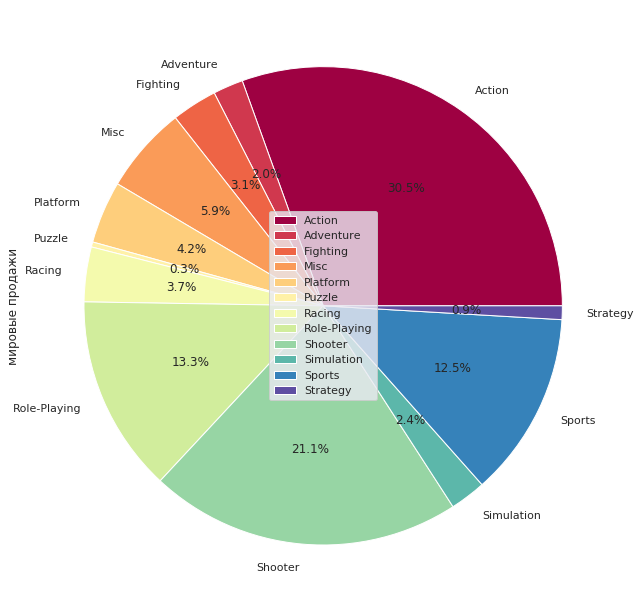

In [0]:
df_actual.groupby('genre')['world_sales'].sum().plot.pie(figsize=(11,11), autopct='%.1f%%', label='мировые продажи', legend=True, cmap=cmap)
plt.legend(loc='center')
plt.show()

В жанре "экшн" выпускается наибольшее количество игр и продажи здесь также наивысшие. В целом за некоторыми исключениями число выпускаемых игр в том или ином жанре совпадает с их продажами. Исключениями можно назвать жанр "Adventure", у которого низкие продажи (менее 50 млн), но хорошее число игр (около 400), и жанр "Shooter", занимающий 2 место по продажам (400 млн) со средним числом выпущенных игр (около 350).

### Вывод.

- был определен акутальный период (2012 - 2016 гг.)
- была определена продолжительность жизни платформы (около 10 лет)
- определены топ 5 самых прибыльных платформ в актуальном периоде: 'PS3', 'X360', 'PS4', '3DS', 'XOne'. Замечена тенденция к падении продаж каждой из платформ к 2016 году
- определены топ 5 самых продаваемых игр: Grand Theft Auto V, Call of Duty: Modern Warfare 3, Call of Duty: Black Ops II, Call of Duty: Ghosts, Call of Duty: Black Ops 3. Чем популярнее игра, тем сильнее разброс продаж: с разных платформ разные доходы
- для каждой популярной игры в лидеры по продажам выходят одни и те же платформы. Х360, PS3, как правило, всегда в лидерах продаж, а РС и WiiU обычно на более низких позициях
- для всех платформ, кроме PSV, наблюдается положительная корреляция между оценкой критиков и продажами, а зависимости между оценкой пользователей и продажами нет
- самое большое число игр выпущено в жанре "экшн", этот же жанр оказался самым прибыльным

## Шаг 4. Портрет пользователя каждого региона

In [0]:
# расчёт продаж с разных платформ по регионам (абсолютные значения и проценты по отношению к мировым продажам)
regional_sales = df_actual.pivot_table(index='platform', values=['na_sales', 'jp_sales', 'eu_sales', 'world_sales'], aggfunc='sum')
for item in regional_sales.columns[0:3]:
    regional_sales['{}_frac'.format(item)] = regional_sales[item] / regional_sales['world_sales']
regional_sales

,eu_sales,jp_sales,na_sales,world_sales,eu_sales_frac,jp_sales_frac,na_sales_frac
platform,,,,,,,
3DS,61.27,100.62,82.65,257.81,0.237656,0.390287,0.320585
DS,9.24,8.04,18.86,38.73,0.238575,0.207591,0.486961
PC,56.70,0.00,29.88,97.68,0.580467,0.000000,0.305897
PS2,0.13,0.09,0.13,0.45,0.288889,0.200000,0.288889
PS3,163.10,49.39,168.26,445.57,0.366048,0.110847,0.377629
PS4,141.09,15.96,108.74,314.14,0.449131,0.050805,0.346151
PSP,1.77,24.04,2.19,29.01,0.061013,0.828680,0.075491
PSV,13.07,21.84,12.47,53.81,0.242892,0.405873,0.231741
Wii,29.60,8.97,48.56,95.02,0.311513,0.094401,0.511050


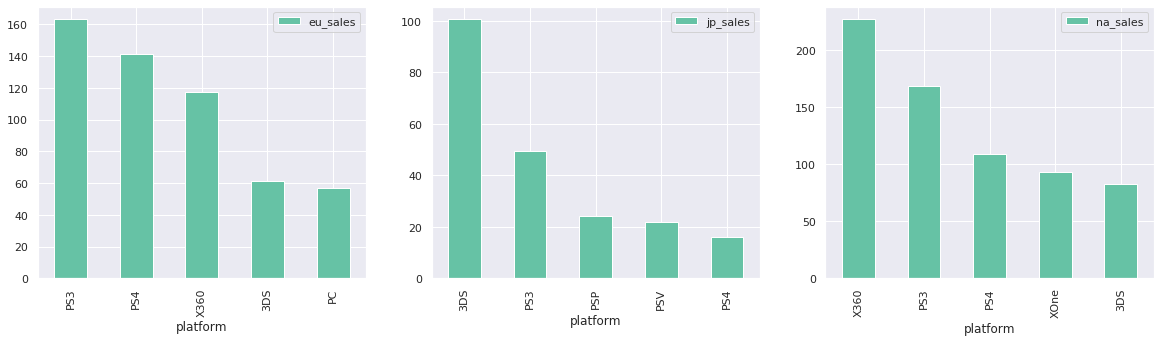

In [0]:
eu_top = regional_sales['eu_sales'].sort_values(ascending=False)[0:5]
na_top = regional_sales['na_sales'].sort_values(ascending=False)[0:5]
jp_top = regional_sales['jp_sales'].sort_values(ascending=False)[0:5]

# ф-ция будет строить бар-чарты для первых трёх колонок любой таблицы
def region_bars(data):
    i = 1
    for item in data.columns[0:3]:
        data[item].sort_values(ascending=False)[0:5].plot(kind='bar', legend=True, ax=plt.subplot(1,3,i), figsize=(20,5))
        i += 1
        
region_bars(regional_sales) # смотрим на продажи с разных платформ в различных регионах

Предпочтения европейцев и американцев имеют много общего, в отличие от японцев. К примеру, платформа 3DS в Японии занимает 1 место по продажам, а в Европе и Америке она наоборот на последних позициях.

In [0]:
# составим в отдельную таблицу рейтинг платформ по продажам для каждого региона
regional_top_platforms = pd.DataFrame(data={'europe':eu_top.index, 'north america':na_top.index, 'japan':jp_top.index}, index=range(1,6))
regional_top_platforms

,europe,north america,japan
1,PS3,X360,3DS
2,PS4,PS3,PS3
3,X360,PS4,PSP
4,3DS,XOne,PSV
5,PC,3DS,PS4


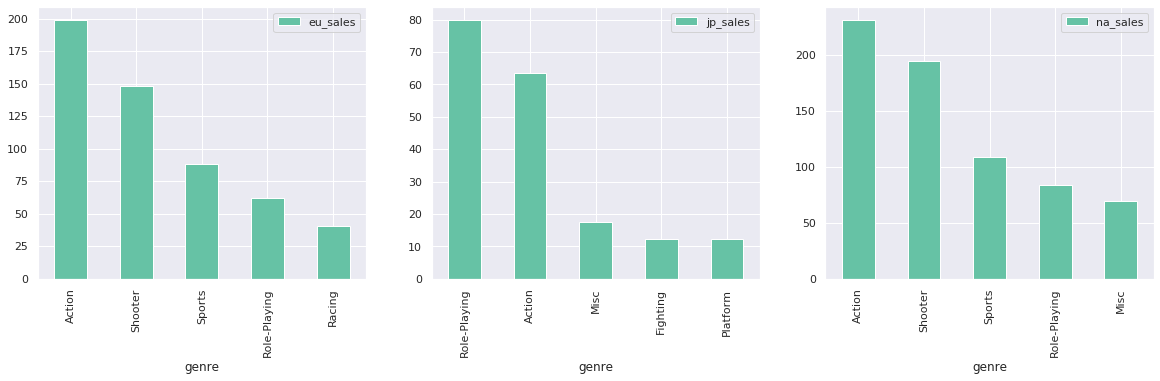

In [0]:
regional_genres = df_actual.pivot_table(index='genre', values=['na_sales', 'jp_sales', 'eu_sales', 'world_sales'], aggfunc='sum')
eu_top_genre = regional_genres['eu_sales'].sort_values(ascending=False)[0:5]
na_top_genre = regional_genres['na_sales'].sort_values(ascending=False)[0:5]
jp_top_genre = regional_genres['jp_sales'].sort_values(ascending=False)[0:5]

region_bars(regional_genres)

В жанровых предпочтениях японцы так же сильно отличаются. Самый популярный в Японии жанр - это ролевая игра, а в Европе и Америке он на 4 месте.

In [0]:
# составим в отдельную таблицу рейтинг платформ по продажам для каждого региона
regional_top_genres = pd.DataFrame(data={'europe':eu_top_genre.index, 'north america':na_top_genre.index, 'japan':jp_top_genre.index}, index=range(1,6))
regional_top_genres

,europe,north america,japan
1,Action,Action,Role-Playing
2,Shooter,Shooter,Action
3,Sports,Sports,Misc
4,Role-Playing,Role-Playing,Fighting
5,Racing,Misc,Platform


Исследуем теперь, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [0]:
sales_by_rating = df_actual.pivot_table(index='rating', values=['na_sales', 'jp_sales', 'eu_sales'], aggfunc='sum')
sales_by_rating

,eu_sales,jp_sales,na_sales
rating,,,
E,141.73,36.68,170.17
E10+,78.00,11.23,117.72
EC,0.00,0.00,0.42
M,250.26,26.14,308.45
Not defined,116.64,138.21,123.69
T,83.16,33.39,109.31


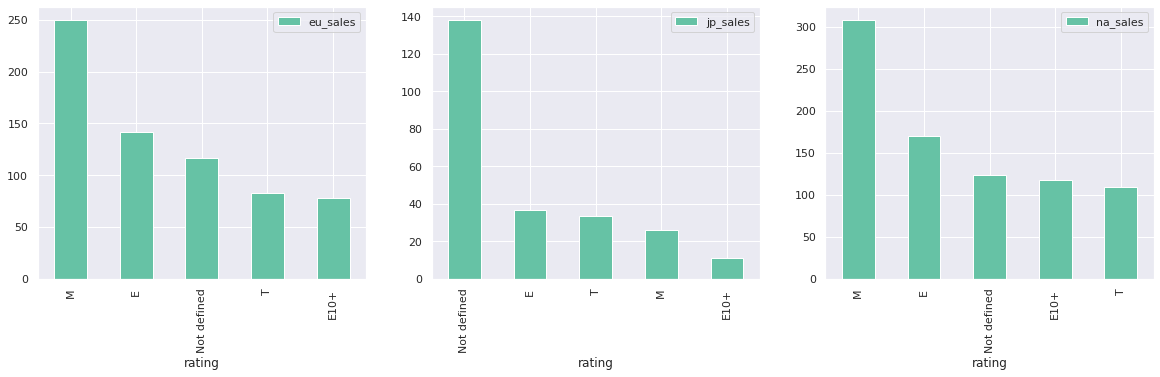

In [0]:
region_bars(sales_by_rating)

В Европе и Америке ситуация практически идентична, в то время как в Японии самые продаваемые игры имеют не определенную возрастную категорию.

### Вывод.

Были изучены особенности в предпочтениях пользователей в зависимости от региона. В общем можно сказать, что европейцы и американцы имеют схожие предпочтения касательно жанра и игровой платформы.

## Шаг 5. Проверка гипотез.

In [0]:
import scipy.stats as st

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различные

In [0]:
xbox_one = df_actual.query('platform=="XOne" and user_score.isna()==False')['user_score']
pc = df_actual.query('platform=="PC" and user_score.isna()==False')['user_score']

In [0]:
result = st.ttest_ind(xbox_one, pc).pvalue
alpha = 0.05

In [0]:
if result < alpha:
    print(result, 'Принимаем альтернативу')
else:
    print(result, 'Принимаем нулевую гипотезу')

0.6267602271422398 Принимаем нулевую гипотезу


Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action выше

In [0]:
action = df_actual.query('genre=="Action" and user_score.isna()==False')['user_score']
sports = df_actual.query('genre=="Sports" and user_score.isna()==False')['user_score']

In [0]:
result_2 = st.ttest_ind(action, sports).pvalue
result_2

5.1974550252152054e-24

In [0]:
if result_2 / 2 < alpha and action.mean() > sports.mean():
    print(result_2, 'Принимаем альтернативу')
else:
    print(result_2, 'Принимаем нулевую гипотезу')

5.1974550252152054e-24 Принимаем альтернативу


### Вывод.

Были проверены две гипотезы. В результате можно сказать, что \
1) средние пользовательские рейтинги жанров Action выше, чем у Sports \
2) средние пользовательские рейтинги платформ Xbox One и PC одинаковые

### Общий вывод.

При планировании кампании на 2017 год стоит учитывать только данные, начиная с 2012 года, это наш так называемый актуальный период. Также очень важно учитывать особенности предпочтения пользователей из различных регионов, т.к. они достаточно сильно различаются. При проведении рекламной кампании в Японии стоит делать ставку на жанре Role-playing и платформах 3DS и PS3. В Европе наиболее прибыльным будет жанр экшн и платформа PS3, a в Америке экшн и платформа X360.